In [1]:
import sqlite3
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import time
import datetime
import Cdf
import Pmf
import warnings
warnings.filterwarnings('ignore')

%pylab inline
from IPython.core.display import HTML
css = open('style-table.css').read() + open('style-notebook.css').read()
HTML('<style>{}</style>'.format(css))

Populating the interactive namespace from numpy and matplotlib


In [2]:
total_bandwidth=12.4

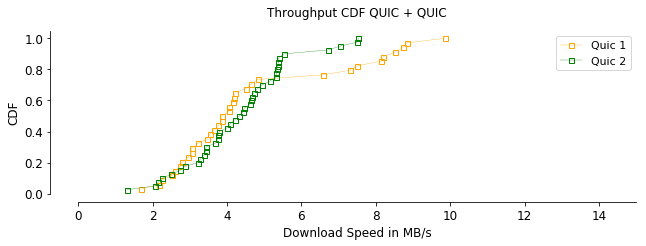

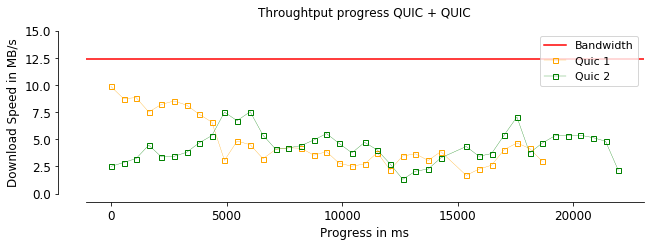

In [3]:
throughput = "./data/pi-1/Throughput/2QUIC/2Q044_throughput_200MB.csv"
t = pd.read_csv(throughput,',')

quic_t = t.loc[t['PID'] == 18777]
quic_t_2 = t.loc[t['PID'] == 18779]

quic_t['Progress'] = quic_t['Timestamp'].apply(lambda x: x - quic_t['Timestamp'].min())
quic_t['Throughput in MB/s'] = quic_t['download'].apply(lambda x: x / 1000)

quic_t_2['Progress'] = quic_t_2['Timestamp'].apply(lambda x: x - quic_t_2['Timestamp'].min())
quic_t_2['Throughput in MB/s'] = quic_t_2['download'].apply(lambda x: x / 1000)


q = Cdf.MakeCdfFromList(quic_t['Throughput in MB/s'].values)
q_2 = Cdf.MakeCdfFromList(quic_t_2['Throughput in MB/s'].values)

fig = plt.figure(figsize = (10,3))
plt.rcParams['font.size'] = 12
ax = plt.gca()
yticks = np.arange(0,1.1,0.2)

plt.plot(q.xs, q.ps, marker='s', linewidth=0.3, markersize=5, fillstyle='none', color = 'orange')

plt.plot(q_2.xs, q_2.ps, marker='s', linewidth=0.3, markersize=5, fillstyle='none', color = 'green')


ax = fig.axes[0]
ax.grid(False)
ax.set_yticks(yticks)
ax.set_ylim([0,1.05])
ax.set_xlim([0, 15])
ax.set_xscale('linear')
ax.set_xlabel('Download Speed in MB/s', fontsize=12)
ax.set_ylabel('CDF', fontsize=12)

plt.legend(['Quic 1', 'Quic 2'] , fontsize=11, loc='best')

ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')
ax.spines['bottom'].set_position(('axes', -0.05))
ax.spines['left'].set_position(('axes', -0.05))

plt.title('Throughput CDF QUIC + QUIC', fontsize=12, y=1.05)
plt.savefig('./plots/PI/throughput/ThroughputCDFQUIC+QUIC.png',format='png',bbox_inches='tight')


fig = plt.figure(figsize = (10,3))
plt.rcParams['font.size'] = 12
ax = plt.gca()
#yticks = np.arange(0,1.1,0.2)


plt.axhline(y=total_bandwidth, color='r', linestyle='-')


plt.plot(quic_t['Progress'], quic_t['Throughput in MB/s'], marker='s', linewidth=0.3, markersize=5, fillstyle='none', color = 'orange')

plt.plot(quic_t_2['Progress'], quic_t_2['Throughput in MB/s'], marker='s', linewidth=0.3, markersize=5, fillstyle='none', color = 'green')


ax = fig.axes[0]
ax.grid(False)
#ax.set_yticks(yticks)
ax.set_ylim([0, 15])
#ax.set_xlim([0,20000])
ax.set_xscale('linear')
ax.set_xlabel('Progress in ms', fontsize=12)
ax.set_ylabel('Download Speed in MB/s', fontsize=12)

plt.legend(['Bandwidth','Quic 1', 'Quic 2',] , fontsize=11, loc='best')

ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')
ax.spines['bottom'].set_position(('axes', -0.05))
ax.spines['left'].set_position(('axes', -0.05))


plt.title('Throughtput progress QUIC + QUIC', fontsize=12, y=1.05)
plt.savefig('./plots/PI/throughput/ThroughtputprogressQUIC+QUIC.png',format='png',bbox_inches='tight')


In [4]:
print(quic_t['Throughput in MB/s'].mean())
print(quic_t_2['Throughput in MB/s'].mean())

4.694249705882352
4.33096775


In [5]:
print(quic_t['Throughput in MB/s'].max())
print(quic_t_2['Throughput in MB/s'].max())

9.85575
7.53632


In [6]:
quic_t['Throughput in MB/s'].max() + quic_t_2.iloc[quic_t['Throughput in MB/s'].idxmax()]['Throughput in MB/s'] 

12.364730000000002

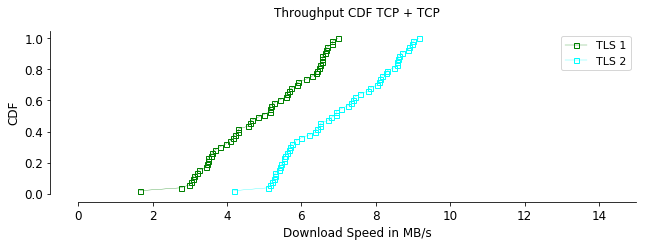

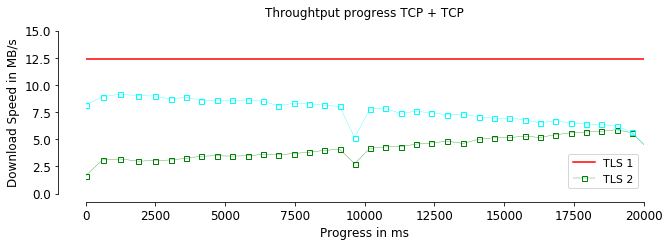

In [7]:
throughput = "./data/pi-1/Throughput/2TLS/2tls_throughput_200MB.csv"
t = pd.read_csv(throughput,',')

tcp_t_2 = t.loc[t['PID'] == 18845]
tcp_t = t.loc[t['PID'] == 18847]


tcp_t_2['Progress'] = tcp_t_2['Timestamp'].apply(lambda x: x - tcp_t_2['Timestamp'].min())
tcp_t_2['Throughput in MB/s'] = tcp_t_2['download'].apply(lambda x: x / 1000)

tcp_t['Progress'] = tcp_t['Timestamp'].apply(lambda x: x - tcp_t['Timestamp'].min())
tcp_t['Throughput in MB/s'] = tcp_t['download'].apply(lambda x: x / 1000)

t_2 = Cdf.MakeCdfFromList(tcp_t_2['Throughput in MB/s'].values)
t = Cdf.MakeCdfFromList(tcp_t['Throughput in MB/s'].values)

fig = plt.figure(figsize = (10,3))
plt.rcParams['font.size'] = 12
ax = plt.gca()
yticks = np.arange(0,1.1,0.2)


plt.plot(t_2.xs, t_2.ps, marker='s', linewidth=0.3, markersize=5, fillstyle='none', color = 'green')

plt.plot(t.xs, t.ps, marker='s', linewidth=0.3, markersize=5, fillstyle='none', color = 'cyan')

ax = fig.axes[0]
ax.grid(False)
ax.set_yticks(yticks)
ax.set_ylim([0,1.05])
ax.set_xlim([0, 15])
ax.set_xscale('linear')
ax.set_xlabel('Download Speed in MB/s', fontsize=12)
ax.set_ylabel('CDF', fontsize=12)

plt.legend([ 'TLS 1', 'TLS 2'] , fontsize=11, loc='best')

ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')
ax.spines['bottom'].set_position(('axes', -0.05))
ax.spines['left'].set_position(('axes', -0.05))

plt.title('Throughput CDF TCP + TCP', fontsize=12, y=1.05)
plt.savefig('./plots/PI/throughput/ThroughputCDFTCP+TCP.png',format='png',bbox_inches='tight')

fig = plt.figure(figsize = (10,3))
plt.rcParams['font.size'] = 12
ax = plt.gca()
#yticks = np.arange(0,1.1,0.2)

plt.axhline(y=total_bandwidth, color='r', linestyle='-')
plt.plot(tcp_t_2['Progress'], tcp_t_2['Throughput in MB/s'], marker='s', linewidth=0.3, markersize=5, fillstyle='none', color = 'green')

plt.plot(tcp_t['Progress'], tcp_t['Throughput in MB/s'], marker='s', linewidth=0.3, markersize=5, fillstyle='none', color = 'cyan')

ax = fig.axes[0]
ax.grid(False)
#ax.set_yticks(yticks)
ax.set_ylim([0, 15])
ax.set_xlim([0,20000])
ax.set_xscale('linear')
ax.set_xlabel('Progress in ms', fontsize=12)
ax.set_ylabel('Download Speed in MB/s', fontsize=12)

plt.legend(['TLS 1', 'TLS 2'] , fontsize=11, loc='best')

ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')
ax.spines['bottom'].set_position(('axes', -0.05))
ax.spines['left'].set_position(('axes', -0.05))


plt.title('Throughtput progress TCP + TCP', fontsize=12, y=1.05)
plt.savefig('./plots/PI/throughput/ThroughtputprogressTCP+TCP.png',format='png',bbox_inches='tight')

In [8]:
print(tcp_t_2['Throughput in MB/s'].mean())
print(tcp_t ['Throughput in MB/s'].mean())

4.894550754716982
6.935246415094339


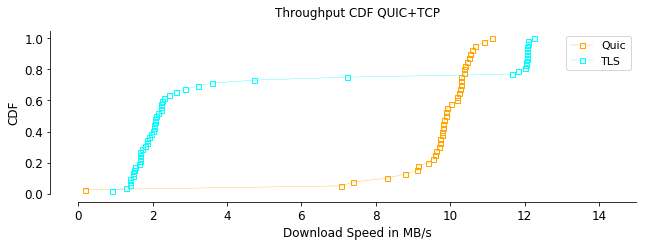

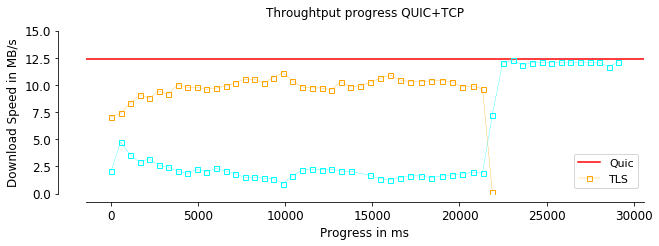

In [9]:
throughput = "./data/pi-1/Throughput/1QUIC1TCP_200MB/throughput_8.csv"
t = pd.read_csv(throughput,',')

quic_t = t.loc[t['PID'] == 18310]
tcp_t = t.loc[t['PID'] == 18308]

quic_t['Progress'] = quic_t['Timestamp'].apply(lambda x: x - quic_t['Timestamp'].min())
quic_t['Throughput in MB/s'] = quic_t['download'].apply(lambda x: x / 1000)

tcp_t['Progress'] = tcp_t['Timestamp'].apply(lambda x: x - tcp_t['Timestamp'].min())
tcp_t['Throughput in MB/s'] = tcp_t['download'].apply(lambda x: x / 1000)

q = Cdf.MakeCdfFromList(quic_t['Throughput in MB/s'].values)
t = Cdf.MakeCdfFromList(tcp_t['Throughput in MB/s'].values)

fig = plt.figure(figsize = (10,3))
plt.rcParams['font.size'] = 12
ax = plt.gca()
yticks = np.arange(0,1.1,0.2)

plt.plot(q.xs, q.ps, marker='s', linewidth=0.3, markersize=5, fillstyle='none', color = 'orange')

plt.plot(t.xs, t.ps, marker='s', linewidth=0.3, markersize=5, fillstyle='none', color = 'cyan')

ax = fig.axes[0]
ax.grid(False)
ax.set_yticks(yticks)
ax.set_ylim([0,1.05])
ax.set_xlim([0, 15])
ax.set_xscale('linear')
ax.set_xlabel('Download Speed in MB/s', fontsize=12)
ax.set_ylabel('CDF', fontsize=12)

plt.legend(['Quic', 'TLS'] , fontsize=11, loc='best')

ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')
ax.spines['bottom'].set_position(('axes', -0.05))
ax.spines['left'].set_position(('axes', -0.05))

plt.title('Throughput CDF QUIC+TCP', fontsize=12, y=1.05)
plt.savefig('./plots/PI/throughput/ThroughputCDFQUIC+TCP.png',format='png',bbox_inches='tight')
fig = plt.figure(figsize = (10,3))
plt.rcParams['font.size'] = 12
ax = plt.gca()
#yticks = np.arange(0,1.1,0.2)
plt.axhline(y=total_bandwidth, color='r', linestyle='-')
plt.plot(quic_t['Progress'], quic_t['Throughput in MB/s'], marker='s', linewidth=0.3, markersize=5, fillstyle='none', color = 'orange')

plt.plot(tcp_t['Progress'], tcp_t['Throughput in MB/s'], marker='s', linewidth=0.3, markersize=5, fillstyle='none', color = 'cyan')

ax = fig.axes[0]
ax.grid(False)
#ax.set_yticks(yticks)
ax.set_ylim([0, 15])
#ax.set_xlim([0,20000])
ax.set_xscale('linear')
ax.set_xlabel('Progress in ms', fontsize=12)
ax.set_ylabel('Download Speed in MB/s', fontsize=12)

plt.legend(['Quic', 'TLS'] , fontsize=11, loc='best')

ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')
ax.spines['bottom'].set_position(('axes', -0.05))
ax.spines['left'].set_position(('axes', -0.05))


plt.title('Throughtput progress QUIC+TCP', fontsize=12, y=1.05)
plt.savefig('./plots/PI/throughput/ThroughtputprogressQUIC+TCP.png',format='png',bbox_inches='tight')

In [10]:
print(quic_t['Throughput in MB/s'].mean())
print(tcp_t ['Throughput in MB/s'].mean())

9.595456199999997
4.627107711538462


In [17]:
print(quic_t['Throughput in MB/s'].max())
print(tcp_t ['Throughput in MB/s'].max())

9.97882
4.04137


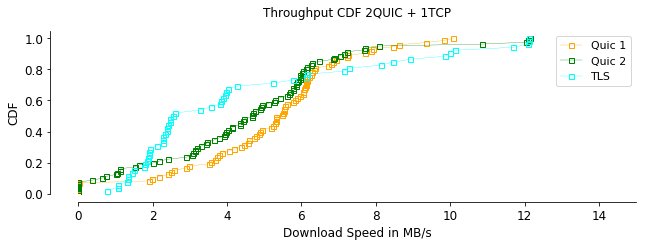

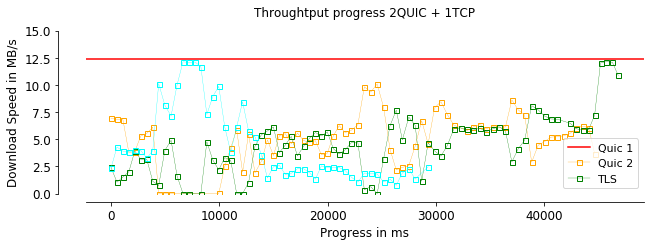

In [11]:
throughput = "./data/pi-1/Throughput/2QUIC1TCP/2QUIC1TLS_throughput_200MB.csv"
t = pd.read_csv(throughput,',')

quic_t = t.loc[t['PID'] == 18922]
quic_t_2 = t.loc[t['PID'] == 18924]
tcp_t = t.loc[t['PID'] == 18926]

quic_t['Progress'] = quic_t['Timestamp'].apply(lambda x: x - quic_t['Timestamp'].min())
quic_t['Throughput in MB/s'] = quic_t['download'].apply(lambda x: x / 1000)

quic_t_2['Progress'] = quic_t_2['Timestamp'].apply(lambda x: x - quic_t_2['Timestamp'].min())
quic_t_2['Throughput in MB/s'] = quic_t_2['download'].apply(lambda x: x / 1000)

tcp_t['Progress'] = tcp_t['Timestamp'].apply(lambda x: x - tcp_t['Timestamp'].min())
tcp_t['Throughput in MB/s'] = tcp_t['download'].apply(lambda x: x / 1000)

q = Cdf.MakeCdfFromList(quic_t['Throughput in MB/s'].values)
q_2 = Cdf.MakeCdfFromList(quic_t_2['Throughput in MB/s'].values)
t = Cdf.MakeCdfFromList(tcp_t['Throughput in MB/s'].values)

fig = plt.figure(figsize = (10,3))
plt.rcParams['font.size'] = 12
ax = plt.gca()
yticks = np.arange(0,1.1,0.2)

plt.plot(q.xs, q.ps, marker='s', linewidth=0.3, markersize=5, fillstyle='none', color = 'orange')

plt.plot(q_2.xs, q_2.ps, marker='s', linewidth=0.3, markersize=5, fillstyle='none', color = 'green')

plt.plot(t.xs, t.ps, marker='s', linewidth=0.3, markersize=5, fillstyle='none', color = 'cyan')

ax = fig.axes[0]
ax.grid(False)
ax.set_yticks(yticks)
ax.set_ylim([0,1.05])
ax.set_xlim([0, 15])
ax.set_xscale('linear')
ax.set_xlabel('Download Speed in MB/s', fontsize=12)
ax.set_ylabel('CDF', fontsize=12)

plt.legend(['Quic 1', 'Quic 2', 'TLS'] , fontsize=11, loc='best')

ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')
ax.spines['bottom'].set_position(('axes', -0.05))
ax.spines['left'].set_position(('axes', -0.05))

plt.title('Throughput CDF 2QUIC + 1TCP', fontsize=12, y=1.05)
plt.savefig('./plots/PI/throughput/ThroughputCDF2QUIC+1TCP.png',format='png',bbox_inches='tight')

fig = plt.figure(figsize = (10,3))
plt.rcParams['font.size'] = 12
ax = plt.gca()
#yticks = np.arange(0,1.1,0.2)
plt.axhline(y=total_bandwidth, color='r', linestyle='-')
plt.plot(quic_t['Progress'], quic_t['Throughput in MB/s'], marker='s', linewidth=0.3, markersize=5, fillstyle='none', color = 'orange')

plt.plot(quic_t_2['Progress'], quic_t_2['Throughput in MB/s'], marker='s', linewidth=0.3, markersize=5, fillstyle='none', color = 'green')

plt.plot(tcp_t['Progress'], tcp_t['Throughput in MB/s'], marker='s', linewidth=0.3, markersize=5, fillstyle='none', color = 'cyan')

ax = fig.axes[0]
ax.grid(False)
#ax.set_yticks(yticks)
ax.set_ylim([0, 15])
#ax.set_xlim([0,20000])
ax.set_xscale('linear')
ax.set_xlabel('Progress in ms', fontsize=12)
ax.set_ylabel('Download Speed in MB/s', fontsize=12)

plt.legend(['Quic 1', 'Quic 2', 'TLS'] , fontsize=11, loc='best')

ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')
ax.spines['bottom'].set_position(('axes', -0.05))
ax.spines['left'].set_position(('axes', -0.05))


plt.title('Throughtput progress 2QUIC + 1TCP', fontsize=12, y=1.05)
plt.savefig('./plots/PI/throughput/Throughtputprogress2QUIC+1TCP.png',format='png',bbox_inches='tight')

In [12]:
print(quic_t['Throughput in MB/s'].mean())
print(quic_t_2['Throughput in MB/s'].mean())
print(tcp_t ['Throughput in MB/s'].mean())

5.103072405753423
4.538641742222222
4.37221398076923


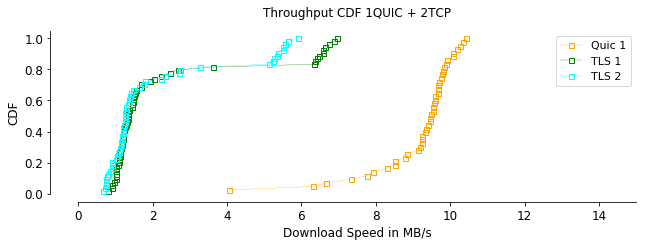

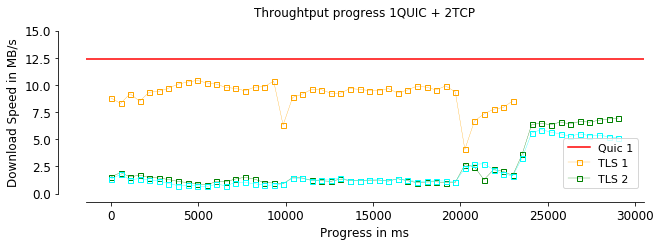

In [13]:
throughput = "./data/pi-1/Throughput/2TCP1QUIC/2tls1QUIC_throughput_200MB.csv"
t = pd.read_csv(throughput,',')

quic_t = t.loc[t['PID'] == 18894]
tcp_t_2 = t.loc[t['PID'] == 18889]
tcp_t = t.loc[t['PID'] == 18891]

quic_t['Progress'] = quic_t['Timestamp'].apply(lambda x: x - quic_t['Timestamp'].min())
quic_t['Throughput in MB/s'] = quic_t['download'].apply(lambda x: x / 1000)

tcp_t_2['Progress'] = tcp_t_2['Timestamp'].apply(lambda x: x - tcp_t_2['Timestamp'].min())
tcp_t_2['Throughput in MB/s'] = tcp_t_2['download'].apply(lambda x: x / 1000)

tcp_t['Progress'] = tcp_t['Timestamp'].apply(lambda x: x - tcp_t['Timestamp'].min())
tcp_t['Throughput in MB/s'] = tcp_t['download'].apply(lambda x: x / 1000)

q = Cdf.MakeCdfFromList(quic_t['Throughput in MB/s'].values)
t_2 = Cdf.MakeCdfFromList(tcp_t_2['Throughput in MB/s'].values)
t = Cdf.MakeCdfFromList(tcp_t['Throughput in MB/s'].values)

fig = plt.figure(figsize = (10,3))
plt.rcParams['font.size'] = 12
ax = plt.gca()
yticks = np.arange(0,1.1,0.2)

plt.plot(q.xs, q.ps, marker='s', linewidth=0.3, markersize=5, fillstyle='none', color = 'orange')

plt.plot(t_2.xs, t_2.ps, marker='s', linewidth=0.3, markersize=5, fillstyle='none', color = 'green')

plt.plot(t.xs, t.ps, marker='s', linewidth=0.3, markersize=5, fillstyle='none', color = 'cyan')

ax = fig.axes[0]
ax.grid(False)
ax.set_yticks(yticks)
ax.set_ylim([0,1.05])
ax.set_xlim([0, 15])
ax.set_xscale('linear')
ax.set_xlabel('Download Speed in MB/s', fontsize=12)
ax.set_ylabel('CDF', fontsize=12)

plt.legend(['Quic 1', 'TLS 1', 'TLS 2'] , fontsize=11, loc='best')

ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')
ax.spines['bottom'].set_position(('axes', -0.05))
ax.spines['left'].set_position(('axes', -0.05))

plt.title('Throughput CDF 1QUIC + 2TCP', fontsize=12, y=1.05)
plt.savefig('./plots/PI/throughput/ThroughputCDF1QUIC+2TCP.png',format='png',bbox_inches='tight')

fig = plt.figure(figsize = (10,3))
plt.rcParams['font.size'] = 12
ax = plt.gca()
#yticks = np.arange(0,1.1,0.2)
plt.axhline(y=total_bandwidth, color='r', linestyle='-')
plt.plot(quic_t['Progress'], quic_t['Throughput in MB/s'], marker='s', linewidth=0.3, markersize=5, fillstyle='none', color = 'orange')

plt.plot(tcp_t_2['Progress'], tcp_t_2['Throughput in MB/s'], marker='s', linewidth=0.3, markersize=5, fillstyle='none', color = 'green')

plt.plot(tcp_t['Progress'], tcp_t['Throughput in MB/s'], marker='s', linewidth=0.3, markersize=5, fillstyle='none', color = 'cyan')

ax = fig.axes[0]
ax.grid(False)
#ax.set_yticks(yticks)
ax.set_ylim([0, 15])
#ax.set_xlim([0,20000])
ax.set_xscale('linear')
ax.set_xlabel('Progress in ms', fontsize=12)
ax.set_ylabel('Download Speed in MB/s', fontsize=12)

plt.legend(['Quic 1', 'TLS 1', 'TLS 2'] , fontsize=11, loc='best')

ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')
ax.spines['bottom'].set_position(('axes', -0.05))
ax.spines['left'].set_position(('axes', -0.05))


plt.title('Throughtput progress 1QUIC + 2TCP', fontsize=12, y=1.05)
plt.savefig('./plots/PI/throughput/Throughtputprogress1QUIC+2TCP.png',format='png',bbox_inches='tight')

In [14]:
print(quic_t['Throughput in MB/s'].mean())
print(tcp_t_2['Throughput in MB/s'].mean())
print(tcp_t ['Throughput in MB/s'].mean())

9.128477906976746
2.3644839444444443
2.086749648148148


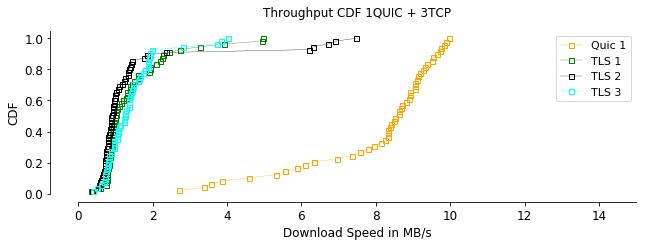

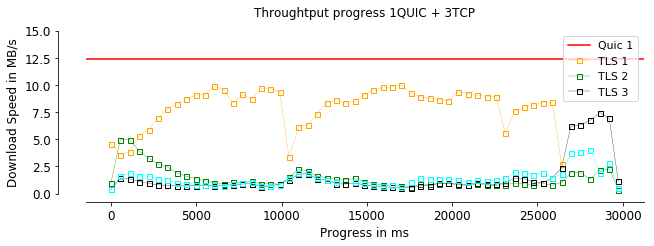

In [15]:
throughput = "./data/pi-1/Throughput/3TCP1QUIC/3tls1QUIC_throughput_200MB.csv"
t = pd.read_csv(throughput,',')

quic_t = t.loc[t['PID'] == 18975]
tcp_t_2 = t.loc[t['PID'] == 18967]
tcp_t = t.loc[t['PID'] == 18969]
tcp_t_3 = t.loc[t['PID'] == 18972]

quic_t['Progress'] = quic_t['Timestamp'].apply(lambda x: x - quic_t['Timestamp'].min())
quic_t['Throughput in MB/s'] = quic_t['download'].apply(lambda x: x / 1000)

tcp_t_2['Progress'] = tcp_t_2['Timestamp'].apply(lambda x: x - tcp_t_2['Timestamp'].min())
tcp_t_2['Throughput in MB/s'] = tcp_t_2['download'].apply(lambda x: x / 1000)

tcp_t_3['Progress'] = tcp_t_3['Timestamp'].apply(lambda x: x - tcp_t_3['Timestamp'].min())
tcp_t_3['Throughput in MB/s'] = tcp_t_3['download'].apply(lambda x: x / 1000)

tcp_t['Progress'] = tcp_t['Timestamp'].apply(lambda x: x - tcp_t['Timestamp'].min())
tcp_t['Throughput in MB/s'] = tcp_t['download'].apply(lambda x: x / 1000)

q = Cdf.MakeCdfFromList(quic_t['Throughput in MB/s'].values)
t_2 = Cdf.MakeCdfFromList(tcp_t_2['Throughput in MB/s'].values)
t_3 = Cdf.MakeCdfFromList(tcp_t_3['Throughput in MB/s'].values)
t = Cdf.MakeCdfFromList(tcp_t['Throughput in MB/s'].values)

fig = plt.figure(figsize = (10,3))
plt.rcParams['font.size'] = 12
ax = plt.gca()
yticks = np.arange(0,1.1,0.2)



plt.plot(q.xs, q.ps, marker='s', linewidth=0.3, markersize=5, fillstyle='none', color = 'orange')

plt.plot(t_2.xs, t_2.ps, marker='s', linewidth=0.3, markersize=5, fillstyle='none', color = 'green')

plt.plot(t_3.xs, t_3.ps, marker='s', linewidth=0.3, markersize=5, fillstyle='none', color = 'black')

plt.plot(t.xs, t.ps, marker='s', linewidth=0.3, markersize=5, fillstyle='none', color = 'cyan')

ax = fig.axes[0]
ax.grid(False)
ax.set_yticks(yticks)
ax.set_ylim([0,1.05])
ax.set_xlim([0, 15])
ax.set_xscale('linear')
ax.set_xlabel('Download Speed in MB/s', fontsize=12)
ax.set_ylabel('CDF', fontsize=12)

plt.legend(['Quic 1', 'TLS 1', 'TLS 2', 'TLS 3'] , fontsize=11, loc='best')

ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')
ax.spines['bottom'].set_position(('axes', -0.05))
ax.spines['left'].set_position(('axes', -0.05))

plt.title('Throughput CDF 1QUIC + 3TCP', fontsize=12, y=1.05)
plt.savefig('./plots/PI/throughput/ThroughputCDF1QUIC+3TCP.png',format='png',bbox_inches='tight')

fig = plt.figure(figsize = (10,3))
plt.rcParams['font.size'] = 12
ax = plt.gca()
#yticks = np.arange(0,1.1,0.2)
plt.axhline(y=total_bandwidth, color='r', linestyle='-')
plt.plot(quic_t['Progress'], quic_t['Throughput in MB/s'], marker='s', linewidth=0.3, markersize=5, fillstyle='none', color = 'orange')

plt.plot(tcp_t_2['Progress'], tcp_t_2['Throughput in MB/s'], marker='s', linewidth=0.3, markersize=5, fillstyle='none', color = 'green')

plt.plot(tcp_t_3['Progress'], tcp_t_3['Throughput in MB/s'], marker='s', linewidth=0.3, markersize=5, fillstyle='none', color = 'black')

plt.plot(tcp_t['Progress'], tcp_t['Throughput in MB/s'], marker='s', linewidth=0.3, markersize=5, fillstyle='none', color = 'cyan')

ax = fig.axes[0]
ax.grid(False)
#ax.set_yticks(yticks)
ax.set_ylim([0, 15])
#ax.set_xlim([0,20000])
ax.set_xscale('linear')
ax.set_xlabel('Progress in ms', fontsize=12)
ax.set_ylabel('Download Speed in MB/s', fontsize=12)

plt.legend(['Quic 1', 'TLS 1', 'TLS 2', 'TLS 3'] , fontsize=11, loc='best')

ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')
ax.spines['bottom'].set_position(('axes', -0.05))
ax.spines['left'].set_position(('axes', -0.05))


plt.title('Throughtput progress 1QUIC + 3TCP', fontsize=12, y=1.05)
plt.savefig('./plots/PI/throughput/Throughtputprogress1QUIC+3TCP.png',format='png',bbox_inches='tight')

In [16]:
print(quic_t['Throughput in MB/s'].mean())
print(tcp_t_2['Throughput in MB/s'].mean())
print(tcp_t ['Throughput in MB/s'].mean())
print(tcp_t_3['Throughput in MB/s'].mean())

7.976325306122449
1.4357211818181823
1.3994762222222221
1.4993854000000006
